In [1]:
#!/usr/bin/env python3
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pyhf

try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass

### Get Tobias data

In [2]:
b2tf_effs = np.genfromtxt('./JZ_numerics/b2tf_effs.csv',delimiter=',',names=True)
b2tf_data_df = pd.DataFrame(b2tf_effs,columns=b2tf_effs.dtype.names)
b2tf_data_df['dm'] = b2tf_data_df['m1']-b2tf_data_df['m0']

### Get B2TF recast data

In [3]:
b2tf_effs_R = np.genfromtxt('./b2tf_trigger_effs.csv',delimiter=',',names=True)
b2tf_data_df_R = pd.DataFrame(b2tf_effs_R,columns=b2tf_effs_R.dtype.names)
b2tf_data_df_R['dm'] = b2tf_data_df_R['m1']-b2tf_data_df_R['m0']

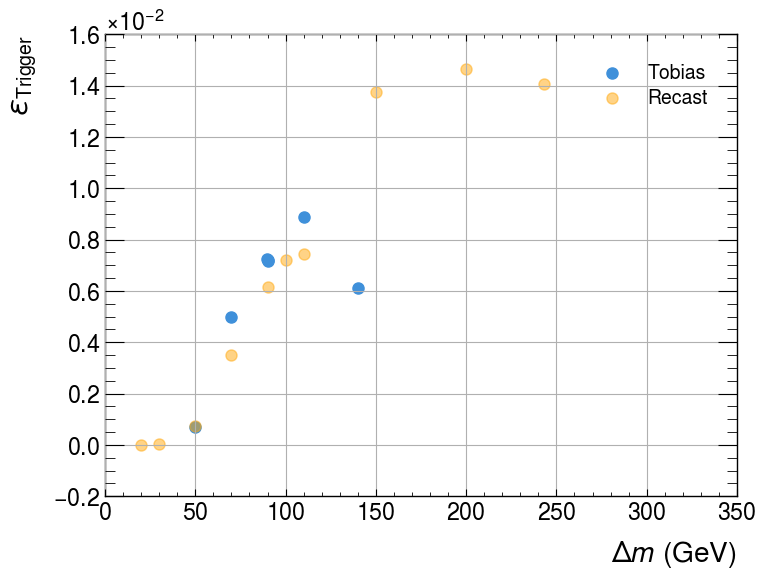

In [7]:
# plt.errorbar(data_recast['ctaum'],data_recast['effTrigger'],yerr=data_recast['effErr'],
#               fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)


ms = 500.0
ctau = 4.0
# Filter data
b2tf_data_df_filter = b2tf_data_df[(b2tf_data_df['ms'] == ms) & (np.abs(b2tf_data_df['ctau']-ctau) < 0.1)]
b2tf_data_df_filter = b2tf_data_df_filter.sort_values('dm')

b2tf_data_df_filter_R = b2tf_data_df_R[(b2tf_data_df_R['ms'] == ms) & (np.abs(b2tf_data_df_R['ctau']-ctau) < 0.1)]
b2tf_data_df_filter_R = b2tf_data_df_filter_R.sort_values('dm')


# plt.errorbar(b2tf_data_df_filter['dm'],b2tf_data_df_filter['eff'],
#          yerr=b2tf_data_df_filter['triggererr'],
          #     fmt="o", color='black', ecolor = "black",linewidth=2,markersize=3)
plt.scatter(b2tf_data_df_filter['dm'],b2tf_data_df_filter['eff'],label='Tobias')
plt.scatter(b2tf_data_df_filter_R['dm'],b2tf_data_df_filter_R['eff'],label='Recast',alpha=0.5)
plt.xlabel(r'$\Delta m$ (GeV)')
plt.ylabel(r'$\epsilon_{\rm Trigger}$')
plt.xlim(0,350.)
# plt.ylim(0.,25e-3)
# plt.yticks(np.arange(0.,25e-3,2e-3))
# plt.xticks(np.arange(0.,20.,2.))
plt.grid()
# plt.title(r'$m_S$ = %1.0f GeV, $m_1 = $ %1.2f GeV, $m_0 = $ %1.2f GeV, $\Delta m_{10} = $ %1.1f, $\beta^* = $ %1.1f' %(mS,m1,m0,dm,beta),
          # fontsize=10)
plt.legend()
plt.show()

In [5]:
b2tf_data_df_filter

,ms,m1,m0,ctau,eff,dm
5,500.0,244.9,194.9,4.0,0.000709,50.0
6,500.0,244.9,175.1,4.0,0.004996,69.8
7,500.0,244.9,155.1,4.0,0.007228,89.8
27,500.0,244.9,154.9,4.0,0.007190,90.0
35,500.0,244.9,154.9,4.0,0.007176,90.0
8,500.0,244.9,134.8,4.0,0.008894,110.1
9,500.0,244.9,104.9,4.0,0.006130,140.0


In [6]:
b2tf_data_df_filter_R

,ctau,m1,m0,ms,eff,efferror,dm
768,3.981,244.0,224.0,500.0,0.00000,0.000000,20.0
706,3.981,244.0,214.0,500.0,0.00004,0.000020,30.0
24,3.981,244.0,194.0,500.0,0.00073,0.000085,50.0
86,3.981,244.0,174.0,500.0,0.00352,0.000188,70.0
148,3.981,244.0,154.0,500.0,0.00615,0.000248,90.0
210,3.981,244.0,144.0,500.0,0.00719,0.000268,100.0
272,3.981,244.0,134.0,500.0,0.00744,0.000273,110.0
334,3.981,244.0,94.0,500.0,0.01375,0.000371,150.0
396,3.981,244.0,44.0,500.0,0.01465,0.000383,200.0
458,3.981,244.0,1.0,500.0,0.01406,0.000375,243.0
